# Week 3

Notebook content based on the Coursera online course "Julia Scientific Programming"

This week we learn how to use Julia to model the ebola virus studied last week (Week 2) with an "SIR" ("Susceptible, Infected, Removed") model.

## The Discrete SIR Model

Let:
* $t$ be the time in days.
* $S(t)$ be the number of individuals susceptible to catching the disease.
* $I(t)$ be the number of infected individuals.
* $R(t)$ be the number of individuals dead or recovered from the disease; No longer susceptible.

The discrete time-step is $dt$.

There is an equal likelyhood of a susceptible person contacting an infected person and vice-versa. Therefore, the number of daily contacts between an infected person and a susceptible one is proportional to $SI$. From this number of contacts assume some fixed fraction of them get infected. Let $\lambda$ be the proportionality constant for the contacts that become infected. Hence, in a time $dt$, there are $\lambda SI\,dt$ newly infected individuals.

Suppose a percentage $\gamma$ of infected individuals either dies or recovers from the disease per day. Hence, in a time $dt$, there will be $\gamma I\,dt$ fewer infected individuals.

Therefore, the numbers of susceptible, infected and removed individuals at time $t + dt$ is given by:

* $S(t_{i+1}) = S(t_i + dt) = S(t_i) - \lambda\,S(t_i)\,I(t_i)\,dt$
* $I(t_{i+1}) = I(t_i + dt) = I(t_i) + \lambda\,S(t_i)\,I(t_i)\,dt - \gamma\,I(t_i)\,dt$
* $R(t_{i+1}) = R(t_i + dt) = R(t_i) + \gamma\,I(t_i)\,dt$

## Implementing the Discrete SIR Model in Julia

We will write a single function which takes in values of $S$, $I$ and $R$ at a time $t$ and returns the values of $S$, $I$ and $R$ at time $t + dt$.

In [14]:
# Define the update SIR function

function updateSIR(popnvector)
    susceptibles = popnvector[1]
    infecteds    = popnvector[2]
    removeds     = popnvector[3]
    
    newS = susceptibles - lambda*susceptibles*infecteds*dt
    newI = infecteds + lambda*susceptibles*infecteds*dt - gam*infecteds*dt
    newR = removeds + gam*infecteds*dt
    
    return [newS newI newR] # without commas, makes a row, otherwise makes a column.
end

updateSIR (generic function with 1 method)

## Test the Model

In [15]:
#= We initialize our parameters outside of our function; These become global variables and are available within the body of our function =#

# One time step

dt = 0.5
lambda = 1/200; gam = 1/10

s, i, r = 1000., 10, 20 # Multiple assignment of variables
vec = [s i r] # A row vector

updateSIR(vec)

1×3 Array{Float64,2}:
 975.0  34.5  20.5

In [16]:
#= Next we want to step our model through multiple time steps, starting at t = 0 days and stopping at some final end day. =#


# Specify the parameters and initial values

tfinal = 100 # 100 days of simulation
dt = 0.2

lambda = 1/20000
gam = 1/10

S0 = 10000.0
I0 = 4.
R0 = 0.

# Assign the initial values to the 'resultvals' array

nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(nsteps+1, 3) # S I R values
timevec = Array{Float64}(nsteps+1) # time-step values

resultvals[1, :] = [S0 I0 R0]
timevec[1] = 0.

for step = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step, :])
    timevec[step+1] = timevec[step] + dt
end
    

## Plot the Results

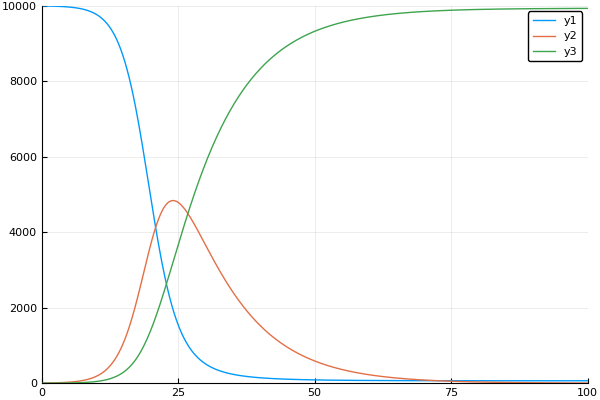

In [17]:
using Plots
pyplot()
# plotly()
plot(timevec, resultvals)

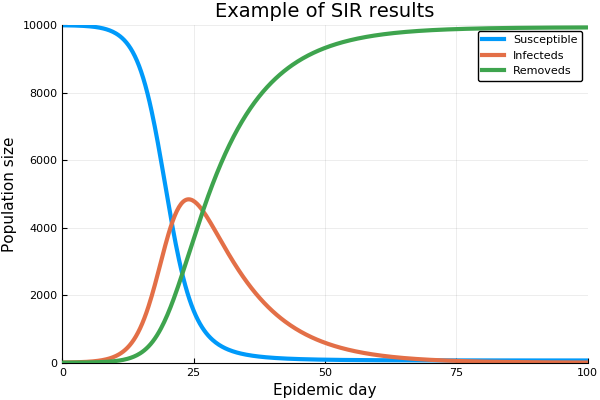

In [18]:
# Make the plot look nicer

plot(timevec, resultvals,
linewidth = 3,
title = "Example of SIR results",
xlabel = "Epidemic day",
ylabel = "Population size",
label = ["Susceptible" "Infecteds" "Removeds"])

## Fitting the Model to the Data

We would like to determine the parameters $\lambda$ and $\gamma$ in our $SIR$ model of the ebola disease which provides a reasonable fit to the collected data of the disease in West Africa.

Consider the equations of the $SIR$ model:

\begin{itemize}
\item $S(t_{i+1}) = S(t_i + dt) = S(t_i) - \lambda\,S(t_i)\,I(t_i)\,dt$
\item $I(t_{i+1}) = I(t_i + dt) = I(t_i) + \lambda\,S(t_i)\,I(t_i)\,dt - \gamma\,I(t_i)\,dt$
\item $R(t_{i+1}) = R(t_i + dt) = R(t_i) + \gamma\,I(t_i)\,dt$
\end{itemize}

We see, from the second equation, that the epidemic occurs only if at time $t = 0$

$\quad\lambda SI - \gamma I > 0 \implies \lambda S - \gamma > 0 \implies S > \gamma/\lambda$

Therefore, $\gamma/\lambda$ provides a threshold value for $S(0)$ to allow for the epidemic.

Also, from the last equation, we see that the fraction of infecteds being removed per day is $\gamma$. The duration of the EVD is approximately three weeks (21 days); An infected individual either dies or recovers 21 days after contracting the disease. Therefore, $1/\gamma = 21$ or $\gamma = 1/21 \approx 0.05$.


### Phase Plane Plot of $I$ versus $S$

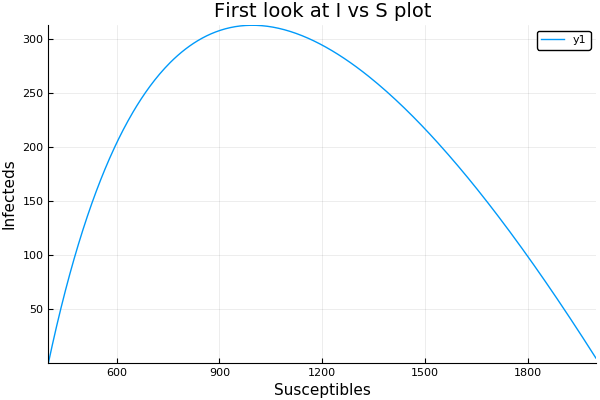

In [21]:
# using Plots
# plotly()


lambda = 1/20000
gam = 1/20
dt = 0.5
tfinal = 610.
s0 = 2000.
i0 = 4.
r0 = 0.

nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(nsteps + 1, 3)
timevec = Array{Float64}(nsteps + 1)
resultvals[1, :] = [s0 i0 r0]
timevec[1] = 0.

for step = 1:nsteps
    resultvals[step + 1, :] = updateSIR(resultvals[step, :])
    timevec[step + 1] = timevec[step] + dt
end

svals = resultvals[:, 1]
ivals = resultvals[:, 2]

plot(svals, ivals, title = "First look at I vs S plot",
ylabel = "Infecteds",
xlabel = "Susceptibles")

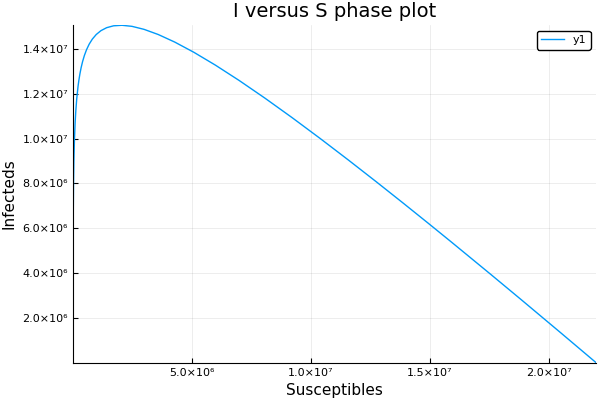

In [22]:
# using Plots
# plotly()

dt = 0.5
tfinal = 610.
gam = 1/20
s0 = 22000000.
i0 = 4.
r0 = 0.
lambda = gam/(0.1*s0)

nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(nsteps + 1, 3)
timevec = Array{Float64}(nsteps + 1)
resultvals[1, :] = [s0 i0 r0]
timevec[1] = 0.

for step = 1:nsteps
    resultvals[step + 1, :] = updateSIR(resultvals[step, :])
    timevec[step + 1] = timevec[step] + dt
end

svals = resultvals[:, 1]
ivals = resultvals[:, 2]

plot(svals, ivals, title = "I versus S phase plot",
ylabel = "Infecteds",
xlabel = "Susceptibles")